In [1]:
library("tidyverse")
library("ggrepel")

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
df_marathon = read.csv('https://raw.githubusercontent.com/chuckpr/BIOS512/main/in-class-exercises/data/marathon.csv')
df_filtered = df_marathon %>% 
filter(country %in% c('United States', 'Kenya', 'Ethiopia', 'Japan'))
df_country = df_marathon %>%
filter(country %in% c('United States', 'Kenya', 'Ethiopia', 'Japan')) %>%
group_by(country, MF) %>%
summarize(race.time = mean(race.time), year = mean(year))

`summarise()` regrouping output by 'country' (override with `.groups` argument)



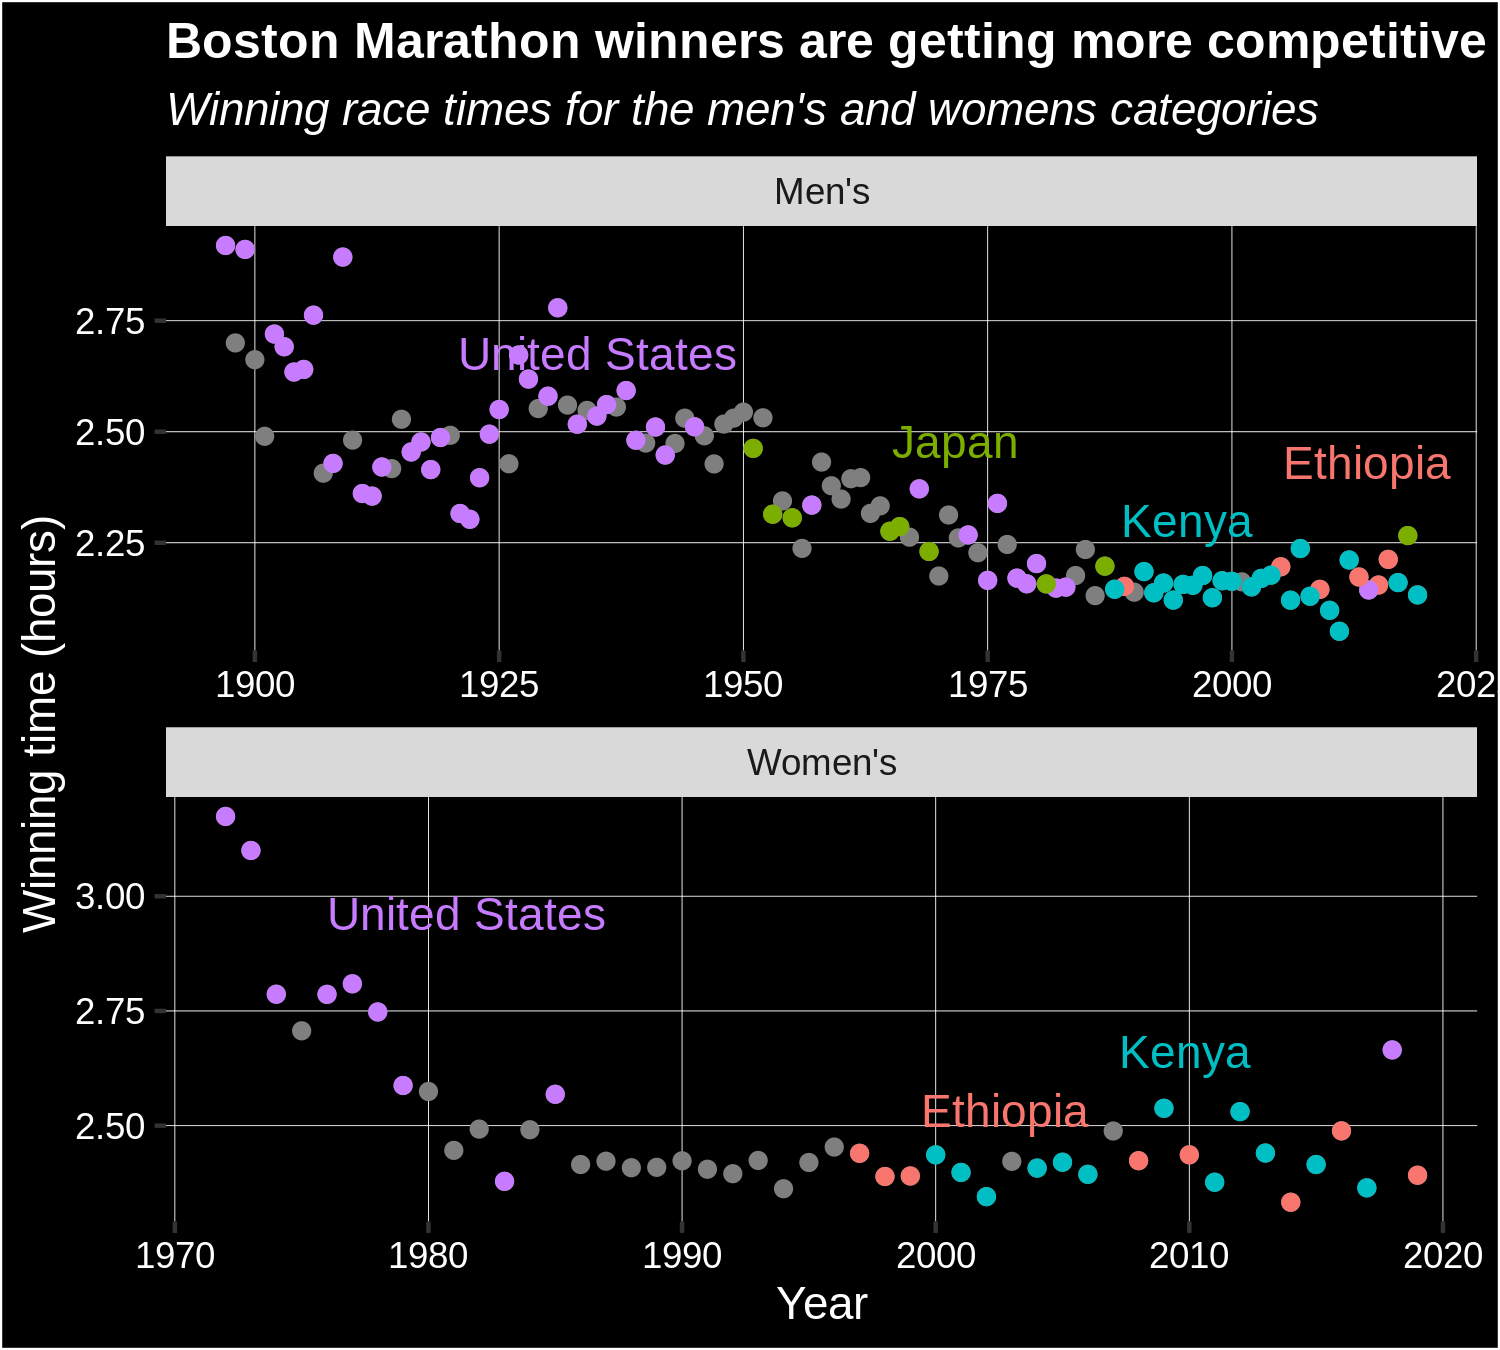

In [26]:
options(repr.plot.width = 5, repr.plot.height = 4.5, repr.plot.res = 300)
p = ggplot(df_marathon, aes(x = year, y = race.time))
p = p + geom_point(color = 'gray50')
p = p + geom_point(data = df_filtered, aes(color = country))
p = p + geom_text_repel(segment.color = 'transparent', nudge_y = 0.2, data = df_country, aes(label = country, color = country))
p = p + facet_wrap(~MF, scales = "free", ncol = 1)
p = p + theme(legend.position = 'none')
p = p + ggtitle("Boston Marathon winners are getting more competitive", subtitle = "Winning race times for the men's and womens categories")
p = p + theme(legend.position = 'none')
p = p + theme(plot.title = element_text(color = "white", size = 12, face = "bold"), plot.subtitle = element_text(color = "white", face = "italic"))
p = p + labs(y= "Winning time (hours)", x = "Year", color = "white")
p = p + theme(panel.border = element_blank(), panel.grid.minor = element_blank(), panel.grid.major = element_line(size = 0.1)) 
p = p + theme(panel.background = element_rect(fill = "black", colour = "black"))
p = p + theme(plot.background = element_rect(fill = "black"))
p = p + theme(axis.title.y = element_text(color = "white"))
p = p + theme(axis.title.x = element_text(color = "white"))
p = p + theme(axis.text.y = element_text(color = "white"))
p = p + theme(axis.text.x = element_text(color = "white"))
p